In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets, regularizers
import tensorflow_addons as tfa
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import keras_tuner
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
import tensorboard
import tempfile
import pathlib

2023-07-18 19:27:40.031032: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/caiomarchiorato/Desktop/visao_comp_algodao/venv/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


## Configurações para melhorar a Pipeline de entrada

In [9]:
devices = tf.config.list_physical_devices()
print(devices)
a=tf.random.normal([100,100])
b=tf.random.normal([100,100])
c = a*b

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [11]:
import tensorflow as tf
tf.debugging.set_log_device_placement(False)
# Verifique as GPUs disponíveis
print("GPUs disponíveis:", tf.config.list_physical_devices('GPU'))



GPUs disponíveis: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
valor_perda, valor_precisao = model_lenet5.evaluate(test_generator)
print('\nPrecisão na classificação das amostras de teste:', valor_precisao)

## LeNet5

In [ ]:
!pip install git+https://github.com/tensorflow/docs

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

num_batches = 10
classes = ["classe1","classe2","classe3","classe4","classe5"]
image_size = 400

train_data_dir = "to_torch/train/"
test_data_dir = "to_torch/test/"
valid_data_dir = "to_torch/valid/"


train_data = image_dataset_from_directory(train_data_dir, batch_size=num_batches, class_names=classes, image_size=(image_size, image_size))
valid_data = image_dataset_from_directory(valid_data_dir, batch_size=num_batches, class_names= classes, image_size= (image_size, image_size))
test_data = image_dataset_from_directory(test_data_dir, batch_size= num_batches, image_size= (image_size, image_size))

Found 447 files belonging to 5 classes.


Found 25 files belonging to 5 classes.


2023-07-18 19:27:49.912930: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-18 19:27:49.912980: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 25 files belonging to 1 classes.


In [3]:
n_train = (len(train_data) * num_batches)
steps_per_epoch = n_train//num_batches

In [ ]:
# Definindo a arquitetura da LeNet-5
model_lenet5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (3, 3), activation='relu',strides= (2,2), input_shape=(image_size, image_size, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', strides=(2,2)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    
    #TESTAR FUNÇAO SIGMOID (0)
    tf.keras.layers.Dense(5, activation='softmax')
])

# # Compilando o modelo
# model_lenet5.compile(optimizer='adam', 
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
#               metrics=['accuracy'])

# model_lenet5.summary()

In [4]:
class_names = train_data.class_names
print(class_names)

['classe1', 'classe2', 'classe3', 'classe4', 'classe5']


In [5]:
for image_batch, labels_batch in train_data:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

2023-07-18 19:27:55.779326: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [447]
	 [[{{node Placeholder/_4}}]]
2023-07-18 19:27:55.779818: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [447]
	 [[{{node Placeholder/_4}}]]


(10, 600, 600, 3)
(10,)


In [6]:
import numpy as np

normalization_layer = tf.keras.layers.Rescaling(1./255)

normalized_data = train_data.map(lambda x, y,: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_data))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

2023-07-18 19:27:57.126724: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [447]
	 [[{{node Placeholder/_4}}]]
2023-07-18 19:27:57.127173: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [447]
	 [[{{node Placeholder/_0}}]]


0.038497172 0.6803269


In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
valid_data = valid_data.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001,
    decay_steps= steps_per_epoch*100,
    decay_rate=1,
    staircase=False
)

def get_log_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)
        print("Pasta criada com sucesso")
    else:
        print("A pasta já existe")
    return path


def get_callbacks(path):
    return [
        tfdocs.modeling.EpochDots(),
        tf.keras.callbacks.EarlyStopping(monitor='acc', patience=20, mode="max"),
        tf.keras.callbacks.TensorBoard(log_dir= get_log_dir(path)),
    ]

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

def compile_and_fit(model, train_Data, validation_Data, max_epochs, callback_path,optimizer= None):
    if optimizer is None:
        optimizer = get_optimizer()
    model.compile(optimizer= optimizer,
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics= [
                             keras.metrics.SparseCategoricalAccuracy(name="acc"),
                             keras.metrics.SparseTopKCategoricalAccuracy(2, name="top5-acc")]
                         )
    model.summary()
    
    history = model.fit(
        train_Data,
        steps_per_epoch= steps_per_epoch,
        validation_data= validation_Data,
        epochs= max_epochs,
        callbacks= get_callbacks(callback_path)
    )
    return history


In [9]:
history = {}
history["lenet5"] = compile_and_fit(model_lenet5,
                                           train_Data= train_data,
                                           validation_Data= valid_data,
                                           max_epochs= 100,
                                           callback_path= "logs_lenet5")

NameError: name 'model_lenet5' is not defined

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'acc')
plotter.plot(history)

val_acc = history["lenet5"].history['val_acc']
max_val_acc = max(val_acc)

print("Maior valor de val_acc observado:", max_val_acc)

plt.axhline(max_val_acc, color='red', linestyle='dashed', label='Max val_acc')
plt.legend()

# Mostrar o gráfico
plt.show()

### LeNet5 - regularizers L2

In [ ]:
model_lenet5_l2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (3, 3), activation='relu',strides= (2,2), input_shape=(image_size, image_size, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', strides=(2,2)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu',
                          kernel_regularizer= regularizers.l2(0.01)),
    tf.keras.layers.Dropout(rate=0.25),
    
    tf.keras.layers.Dense(84, activation='relu',
                          kernel_regularizer= regularizers.l2(0.01)),
    tf.keras.layers.Dropout(rate=0.25),
    
    #TESTAR FUNÇAO SIGMOID (0)
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
history2 = {}
history2["lenet5_l2"] = compile_and_fit(model_lenet5_l2,
                                           train_Data= train_data,
                                           validation_Data= valid_data,
                                           max_epochs= 50,
                                           callback_path= "lenet5_l2")

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'acc')
plotter.plot(history2)

val_acc = history2["lenet5_l2"].history['val_acc']
max_val_acc = max(val_acc)

print("Maior valor de val_acc observado:", max_val_acc)

plt.axhline(max_val_acc, color='red', linestyle='dashed', label='Max val_acc')
plt.legend()

# Mostrar o gráfico
plt.show()

### LeNet5 - compiler SGD 

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001,
    decay_steps= steps_per_epoch*100,
    decay_rate=1,
    staircase=False
)

def get_log_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)
        print("Pasta criada com sucesso")
    else:
        print("A pasta já existe")
    return path


def get_callbacks(path):
    return [
        tfdocs.modeling.EpochDots(),
        tf.keras.callbacks.EarlyStopping(monitor='acc', patience=20, mode="max"),
        tf.keras.callbacks.TensorBoard(log_dir= get_log_dir(path)),
    ]

def get_optimizer():
    return tf.keras.optimizers.SGD(lr_schedule)

def compile_and_fit(model, train_Data, validation_Data, max_epochs, callback_path,optimizer= None):
    if optimizer is None:
        optimizer = get_optimizer()
    model.compile(optimizer= optimizer,
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics= [
                             keras.metrics.SparseCategoricalAccuracy(name="acc"),
                             keras.metrics.SparseTopKCategoricalAccuracy(2, name="top5-acc")]
                         )
    model.summary()
    
    history = model.fit(
        train_Data,
        steps_per_epoch= steps_per_epoch,
        validation_data= validation_Data,
        epochs= max_epochs,
        callbacks= get_callbacks(callback_path)
    )
    return history

model_lenet5_l2_sgd = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (3, 3), activation='relu',strides= (2,2), input_shape=(image_size, image_size, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', strides=(2,2)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu',
                          kernel_regularizer= regularizers.l2(0.01)),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Dense(84, activation='relu',
                          kernel_regularizer= regularizers.l2(0.01)),
    tf.keras.layers.Dropout(rate=0.5),
    
    #TESTAR FUNÇAO SIGMOID (0)
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
history3 = {}
history3["lenet5_sgd"] = compile_and_fit(model_lenet5_l2_sgd,
                                           train_Data= train_data,
                                           validation_Data= valid_data,
                                           max_epochs= 100,
                                           callback_path= "logs_lenet5")

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'acc')
plotter.plot(history3)

val_acc = history3["lenet5_sgd"].history['val_acc']
max_val_acc = max(val_acc)

print("Maior valor de val_acc observado:", max_val_acc)

plt.axhline(max_val_acc, color='red', linestyle='dashed', label='Max val_acc')
plt.legend()

# Mostrar o gráfico
plt.show()

In [ ]:
predict = model.predict_generator(test_generator)

get_best_hp(tuner_bayesian_optimization)

In [ ]:
import matplotlib.pyplot as plt

output_image = model_lenet5_l2.predict(test_data)
plt.imshow(output_image)
plt.show

### LeNet5 - Dropouts 0.25

In [10]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001,
    decay_steps= steps_per_epoch*100,
    decay_rate=1,
    staircase=False
)

def get_log_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)
        print("Pasta criada com sucesso")
    else:
        print("A pasta já existe")
    return path


def get_callbacks(path):
    return [
        tfdocs.modeling.EpochDots(),
        tf.keras.callbacks.EarlyStopping(monitor='acc', patience=20, mode="max"),
        tf.keras.callbacks.TensorBoard(log_dir= get_log_dir(path)),
    ]

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

def compile_and_fit(model, train_Data, validation_Data, max_epochs, callback_path,optimizer= None):
    if optimizer is None:
        optimizer = get_optimizer()
    model.compile(optimizer= optimizer,
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics= [
                             keras.metrics.SparseCategoricalAccuracy(name="acc"),
                             keras.metrics.SparseTopKCategoricalAccuracy(2, name="top5-acc")]
                         )
    model.summary()
    
    history = model.fit(
        train_Data,
        steps_per_epoch= steps_per_epoch,
        validation_data= validation_Data,
        epochs= max_epochs,
        callbacks= get_callbacks(callback_path)
    )
    return history

In [11]:

# Definindo a arquitetura da LeNet-5
model_lenet5_drop025 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (3, 3), activation='relu',strides= (2,2), input_shape=(image_size, image_size, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', strides=(2,2)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dropout(rate=0.25),
    
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dropout(rate=0.25),
    
    #TESTAR FUNÇAO SIGMOID (0)
    tf.keras.layers.Dense(5, activation='softmax')
])

In [12]:
history4 = {}
history4["lenet5_drop025"] = compile_and_fit(model_lenet5_drop025,
                                           train_Data= train_data,
                                           validation_Data= valid_data,
                                           max_epochs= 100,
                                           callback_path= "logs_lenet5")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 299, 299, 6)       168       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 16)        880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 21904)             0         
                                                                 
 dense (Dense)               (None, 120)               2

2023-07-18 18:49:21.089511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [447]
	 [[{{node Placeholder/_0}}]]
2023-07-18 18:49:21.089978: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [447]
	 [[{{node Placeholder/_0}}]]
/Users/caiomarchiorato/Desktop/visao_comp_algodao/venv/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, fr

45/45 [==============================] - ETA: 0s - loss: 1836.3615 - acc: 0.1924 - top5-acc: 0.7494

2023-07-18 18:49:28.231241: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [25]
	 [[{{node Placeholder/_0}}]]
2023-07-18 18:49:28.231691: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [25]
	 [[{{node Placeholder/_4}}]]
2023-07-18 18:49:28.377195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch: 0, acc:0.1924,  loss:1836.3615,  top5-acc:0.7494,  val_acc:0.1600,  val_loss:2.8316,  val_top5-acc:0.3600,  
45/45 [==============================] - 8s 128ms/step - loss: 1836.3615 - acc: 0.1924 - top5-acc: 0.7494 - val_loss: 2.8316 - val_acc: 0.1600 - val_top5-acc: 0.3600
Epoch 2/100
45/45 [==============================] - 5s 102ms/step - loss: 2.3618 - acc: 0.2819 - top5-acc: 0.4899 - val_loss: 1.9543 - val_acc: 0.0400 - val_top5-acc: 0.1600
Epoch 3/100
45/45 [==============================] - 5s 100ms/step - loss: 1.7651 - acc: 0.4899 - top5-acc: 0.7114 - val_loss: 2.1804 - val_acc: 0.1600 - val_top5-acc: 0.2800
Epoch 4/100
45/45 [==============================] - 5s 102ms/step - loss: 2.4928 - acc: 0.6107 - top5-acc: 0.7696 - val_loss: 4.5264 - val_acc: 0.1200 - val_top5-acc: 0.3600
Epoch 5/100
45/45 [==============================] - 5s 100ms/step - loss: 8.9918 - acc: 0.6532 - top5-acc: 0.8210 - val_loss: 5.7791 - val_acc: 0.1200 - val_top5-acc: 0.3600
Epoch 6/100
45/45

Maior valor de val_acc observado: 0.4000000059604645


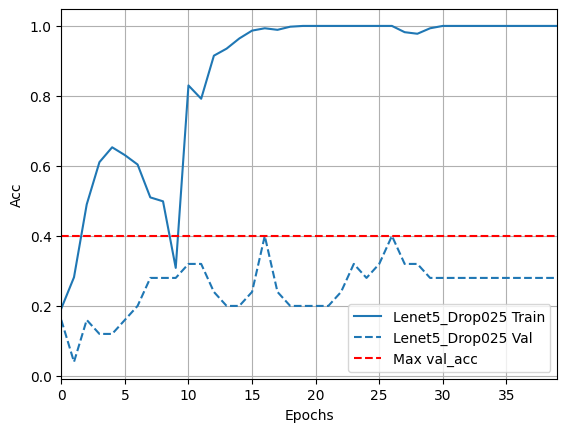

In [13]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'acc')
plotter.plot(history4)

val_acc = history4["lenet5_drop025"].history['val_acc']
max_val_acc = max(val_acc)

print("Maior valor de val_acc observado:", max_val_acc)

plt.axhline(max_val_acc, color='red', linestyle='dashed', label='Max val_acc')
plt.legend()

# Mostrar o gráfico
plt.show()

### LeNet5 - Dropout 0.5 + L2

In [10]:
model_lenet5_dropout_l2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (3, 3), activation='relu',strides= (2,2), input_shape=(image_size, image_size, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', strides=(2,2)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu',
                          kernel_regularizer= regularizers.l2(0.01)),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Dense(84, activation='relu',
                          kernel_regularizer= regularizers.l2(0.01)),
    tf.keras.layers.Dropout(rate=0.5),
    
    #TESTAR FUNÇAO SIGMOID (0)
    tf.keras.layers.Dense(5, activation='softmax')])

In [11]:
history5 = {}
history5["lenet5_drop_l2"] = compile_and_fit(model_lenet5_dropout_l2,
                                           train_Data= train_data,
                                           validation_Data= valid_data,
                                           max_epochs= 100,
                                           callback_path= "logs_lenet5_dropout_l2")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 299, 299, 6)       168       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 16)        880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 21904)             0         
                                                                 
 dense (Dense)               (None, 120)               2

2023-07-18 19:02:48.028360: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [447]
	 [[{{node Placeholder/_4}}]]
2023-07-18 19:02:48.028834: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [447]
	 [[{{node Placeholder/_0}}]]
/Users/caiomarchiorato/Desktop/visao_comp_algodao/venv/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, fro

45/45 [==============================] - ETA: 0s - loss: 538.8649 - acc: 0.2394 - top5-acc: 0.7517

2023-07-18 19:02:55.245572: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [25]
	 [[{{node Placeholder/_0}}]]
2023-07-18 19:02:55.246023: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [25]
	 [[{{node Placeholder/_0}}]]
2023-07-18 19:02:55.380867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch: 0, acc:0.2394,  loss:538.8649,  top5-acc:0.7517,  val_acc:0.2000,  val_loss:53.8869,  val_top5-acc:0.4000,  
45/45 [==============================] - 8s 132ms/step - loss: 538.8649 - acc: 0.2394 - top5-acc: 0.7517 - val_loss: 53.8869 - val_acc: 0.2000 - val_top5-acc: 0.4000
Epoch 2/100
45/45 [==============================] - 5s 106ms/step - loss: 112.2882 - acc: 0.1969 - top5-acc: 0.4787 - val_loss: 12.4873 - val_acc: 0.2000 - val_top5-acc: 0.4000
Epoch 3/100
45/45 [==============================] - 5s 108ms/step - loss: 18.4323 - acc: 0.2573 - top5-acc: 0.4407 - val_loss: 5.7065 - val_acc: 0.2000 - val_top5-acc: 0.4000
Epoch 4/100
45/45 [==============================] - 5s 106ms/step - loss: 20.2519 - acc: 0.3289 - top5-acc: 0.5436 - val_loss: 6.3036 - val_acc: 0.2000 - val_top5-acc: 0.4800
Epoch 5/100
45/45 [==============================] - 5s 108ms/step - loss: 6.2012 - acc: 0.4609 - top5-acc: 0.6913 - val_loss: 6.7153 - val_acc: 0.2400 - val_top5-acc: 0.4000
Epoch 6/100


Maior valor de val_acc observado: 0.36000001430511475


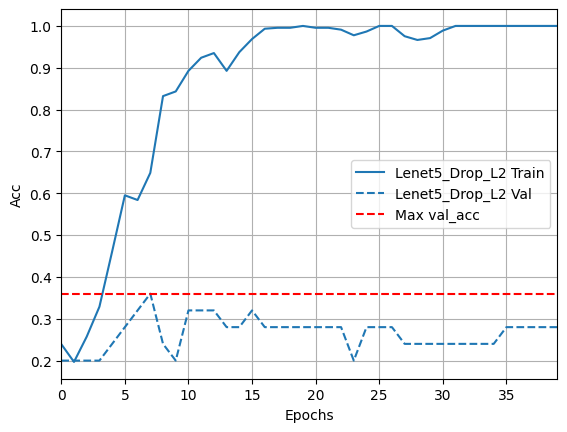

In [12]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'acc')
plotter.plot(history5)

val_acc = history5["lenet5_drop_l2"].history['val_acc']
max_val_acc = max(val_acc)

print("Maior valor de val_acc observado:", max_val_acc)

plt.axhline(max_val_acc, color='red', linestyle='dashed', label='Max val_acc')
plt.legend()

# Mostrar o gráfico
plt.show()

### LeNet5 - (-MaxPooling)

In [12]:
model_lenet5_maxpooling = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (3, 3), activation='relu',strides= (2,2), input_shape=(image_size, image_size, 3)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', strides=(2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    
    #TESTAR FUNÇAO SIGMOID (0)
    tf.keras.layers.Dense(5, activation='softmax')])

In [13]:
history6 = {}
history6["lenet5_drop_maxp"] = compile_and_fit(model_lenet5_maxpooling,
                                           train_Data= train_data,
                                           validation_Data= valid_data,
                                           max_epochs= 100,
                                           callback_path= "logs_lenet5_dropout_l2")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 299, 299, 6)       168       
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 16)      880       
                                                                 
 flatten (Flatten)           (None, 355216)            0         
                                                                 
 dense (Dense)               (None, 120)               42626040  
                                                                 
 dropout (Dropout)           (None, 120)               0         
                                                                 
 dense_1 (Dense)             (None, 84)                10164     
                                                                 
 dropout_1 (Dropout)         (None, 84)                0

2023-07-18 19:28:35.703603: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [447]
	 [[{{node Placeholder/_4}}]]
2023-07-18 19:28:35.704109: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [447]
	 [[{{node Placeholder/_0}}]]
/Users/caiomarchiorato/Desktop/visao_comp_algodao/venv/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, fro

45/45 [==============================] - ETA: 0s - loss: 20364.1406 - acc: 0.2394 - top5-acc: 0.9821

2023-07-18 19:28:48.083744: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [25]
	 [[{{node Placeholder/_0}}]]
2023-07-18 19:28:48.084198: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [25]
	 [[{{node Placeholder/_0}}]]
2023-07-18 19:28:48.210793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch: 0, acc:0.2394,  loss:20364.1406,  top5-acc:0.9821,  val_acc:0.3200,  val_loss:2485.7258,  val_top5-acc:1.0000,  
45/45 [==============================] - 13s 243ms/step - loss: 20364.1406 - acc: 0.2394 - top5-acc: 0.9821 - val_loss: 2485.7258 - val_acc: 0.3200 - val_top5-acc: 1.0000
Epoch 2/100
45/45 [==============================] - 10s 217ms/step - loss: 3131.2756 - acc: 0.3110 - top5-acc: 0.9732 - val_loss: 787.7397 - val_acc: 0.4000 - val_top5-acc: 1.0000
Epoch 3/100
45/45 [==============================] - 10s 216ms/step - loss: 1059.5023 - acc: 0.3915 - top5-acc: 0.9374 - val_loss: 89.3560 - val_acc: 0.4000 - val_top5-acc: 0.9200
Epoch 4/100
45/45 [==============================] - 10s 217ms/step - loss: 67.1300 - acc: 0.5078 - top5-acc: 0.7696 - val_loss: 9.4957 - val_acc: 0.5200 - val_top5-acc: 0.6800
Epoch 5/100
45/45 [==============================] - 10s 217ms/step - loss: 18.7649 - acc: 0.5928 - top5-acc: 0.7919 - val_loss: 8.5487 - val_acc: 0.5200 - val_top5-acc: 

Maior valor de val_acc observado: 0.6000000238418579


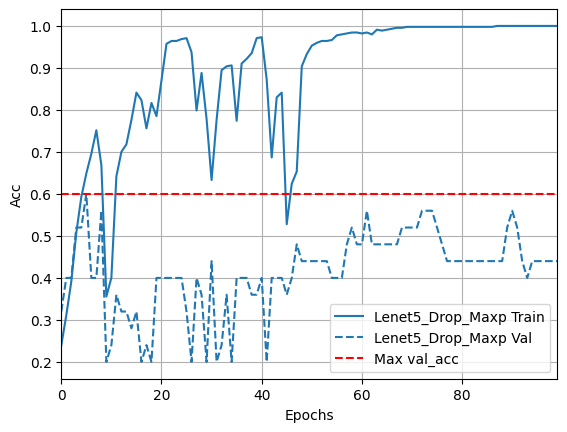

In [14]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'acc')
plotter.plot(history6)

val_acc = history6["lenet5_drop_maxp"].history['val_acc']
max_val_acc = max(val_acc)

print("Maior valor de val_acc observado:", max_val_acc)

plt.axhline(max_val_acc, color='red', linestyle='dashed', label='Max val_acc')
plt.legend()

# Mostrar o gráfico
plt.show()

## TensorBoard

In [ ]:
import tensorboard
%tensorboard --logdir ./logs
